In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import preprocessing
from Bio.Seq import Seq
from Bio import motifs
import random

import keras
np.random.seed(1337)

from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.convolutional import Conv1D

%matplotlib inline

### Parameters for plotting model results ###
pd.set_option("display.max_colwidth",100)
sns.set(style="ticks", color_codes=True)
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.labelpad'] = 5
plt.rcParams['axes.linewidth']= 2
plt.rcParams['xtick.labelsize']= 14
plt.rcParams['ytick.labelsize']= 14
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'


def train_model(x, y, border_mode='same', inp_len=50, nodes=40, layers=3, filter_len=8, nbr_filters=120,
                dropout1=0, dropout2=0, dropout3=0, nb_epoch=3):
    ''' Build model archicture and fit.'''
    model = Sequential()
    if layers >= 1:
        model.add(Conv1D(activation="relu", input_shape=(inp_len, 4), padding=border_mode, filters=nbr_filters, kernel_size=filter_len))
    if layers >= 2:
        model.add(Conv1D(activation="relu", input_shape=(inp_len, 1), padding=border_mode, filters=nbr_filters, kernel_size=filter_len))
        model.add(Dropout(dropout1))
    if layers >= 3:
        model.add(Conv1D(activation="relu", input_shape=(inp_len, 1), padding=border_mode, filters=nbr_filters, kernel_size=filter_len))
        model.add(Dropout(dropout2))
    model.add(Flatten())

    model.add(Dense(nodes))
    model.add(Activation('relu'))
    model.add(Dropout(dropout3))
    
    model.add(Dense(1))
    model.add(Activation('linear'))

    #compile the model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='mean_squared_error', optimizer=adam)

    model.fit(x, y, batch_size=128, epochs=nb_epoch, verbose=1)
    return model


def test_data(df, model, test_seq, obs_col, output_col='pred'):
    '''Predict mean ribosome load using model and test set UTRs'''
    
    # Scale the test set mean ribosome load
    scaler = preprocessing.StandardScaler()
    scaler.fit(df[obs_col].values.reshape(-1,1))   #LAE: .values added, pd deprecation
    
    # Make predictions
    predictions = model.predict(test_seq).reshape(-1)
    
    # Inverse scaled predicted mean ribosome load and return in a column labeled 'pred'
    df.loc[:,output_col] = scaler.inverse_transform(predictions)
    return df


def one_hot_encode(df, col='utr', seq_len=50):
    # Dictionary returning one-hot encoding of nucleotides. 
    nuc_d = {'a':[1,0,0,0],'c':[0,1,0,0],'g':[0,0,1,0],'t':[0,0,0,1], 'n':[0,0,0,0]}
    
    # Creat empty matrix.
    vectors=np.empty([len(df),seq_len,4])
    
    # Iterate through UTRs and one-hot encode
    for i,seq in enumerate(df[col].str[:seq_len]): 
        seq = seq.lower()
        a = np.array([nuc_d[x] for x in seq])
        vectors[i] = a
    return vectors


def r2(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return r_value**2

Using TensorFlow backend.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import preprocessing
from Bio.Seq import Seq
from Bio import motifs
import random

import keras
np.random.seed(1337)

from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.convolutional import Conv1D

%matplotlib inline

### Parameters for plotting model results ###
pd.set_option("display.max_colwidth",100)
sns.set(style="ticks", color_codes=True)
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.labelpad'] = 5
plt.rcParams['axes.linewidth']= 2
plt.rcParams['xtick.labelsize']= 14
plt.rcParams['ytick.labelsize']= 14
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'


def train_model(x, y, border_mode='same', inp_len=50, nodes=40, layers=3, filter_len=8, nbr_filters=120,
                dropout1=0, dropout2=0, dropout3=0, nb_epoch=3):
    ''' Build model archicture and fit.'''
    model = Sequential()
    if layers >= 1:
        model.add(Conv1D(activation="relu", input_shape=(inp_len, 4), padding=border_mode, filters=nbr_filters, kernel_size=filter_len))
    if layers >= 2:
        model.add(Conv1D(activation="relu", input_shape=(inp_len, 1), padding=border_mode, filters=nbr_filters, kernel_size=filter_len))
        model.add(Dropout(dropout1))
    if layers >= 3:
        model.add(Conv1D(activation="relu", input_shape=(inp_len, 1), padding=border_mode, filters=nbr_filters, kernel_size=filter_len))
        model.add(Dropout(dropout2))
    model.add(Flatten())

    model.add(Dense(nodes))
    model.add(Activation('relu'))
    model.add(Dropout(dropout3))
    
    model.add(Dense(1))
    model.add(Activation('linear'))

    #compile the model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='mean_squared_error', optimizer=adam)

    model.fit(x, y, batch_size=128, epochs=nb_epoch, verbose=1)
    return model


def test_data(df, model, test_seq, obs_col, output_col='pred'):
    '''Predict mean ribosome load using model and test set UTRs'''
    
    # Scale the test set mean ribosome load
    scaler = preprocessing.StandardScaler()
    scaler.fit(df[obs_col].values.reshape(-1,1))   #LAE: .values added, pd deprecation
    
    # Make predictions
    predictions = model.predict(test_seq).reshape(-1)
    
    # Inverse scaled predicted mean ribosome load and return in a column labeled 'pred'
    df.loc[:,output_col] = scaler.inverse_transform(predictions)
    return df


def one_hot_encode(df, col='utr', seq_len=50):
    # Dictionary returning one-hot encoding of nucleotides. 
    nuc_d = {'a':[1,0,0,0],'c':[0,1,0,0],'g':[0,0,1,0],'t':[0,0,0,1], 'n':[0,0,0,0]}
    
    # Creat empty matrix.
    vectors=np.empty([len(df),seq_len,4])
    
    # Iterate through UTRs and one-hot encode
    for i,seq in enumerate(df[col].str[:seq_len]): 
        seq = seq.lower()
        a = np.array([nuc_d[x] for x in seq])
        vectors[i] = a
    return vectors


def r2(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return r_value**2

Using TensorFlow backend.


### Load data, make a train and test set based on total reads per UTR
The test set contains UTRs with the highest overall sequencing reads with the idea that increased reads will more accurately reflect the true ribosome load of a given 5'UTR.

In [2]:
#df = pd.read_pickle('../data/egfp_unmod_1.pkl')  #LAE: do not have this pickle file...?
df = pd.read_csv('../data/egfp_unmod_1.csv')
df.sort_values('total_reads', inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df = df.iloc[:280000]

# The training set has 260k UTRs and the test set has 20k UTRs.
e_test = df.iloc[:20000]
e_train = df.iloc[20000:]

# One-hot encode both training and test UTRs
seq_e_train = one_hot_encode(e_train,seq_len=50)
seq_e_test = one_hot_encode(e_test, seq_len=50)

# Scale the training mean ribosome load values
# LAE: added .values before reshape due to pandas naming deprecation
e_train.loc[:,'scaled_rl'] = preprocessing.StandardScaler().fit_transform(e_train.loc[:,'rl'].values.reshape(-1,1))

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Train model
Using the hyperparameter-optimised values.

In [3]:
# Author's Original Model: 3 layers, 120 filters per layer, filter length 8, 40 nodes in the dense layer
# model = train_model(seq_e_train, e_train['scaled_rl'], nb_epoch=3,border_mode='same',
#                     inp_len=50, nodes=40, layers=3, nbr_filters=120, filter_len=8, dropout1=0,
#                     dropout2=0,dropout3=0.2)

In [3]:
# Load Saved Model
model = keras.models.load_model('./saved_models/main_MRL_model.hdf5') #this is the Author's model

W0904 13:06:14.297055 4473013696 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 13:06:14.340425 4473013696 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 13:06:14.364680 4473013696 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 13:06:14.467545 4473013696 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0904 13:06:14.474668 4473013696 deprecati

Evaluate model. Return predicted mean ribosome load as a dataframe column labeled 'pred'.

In [4]:
e_test = test_data(df=e_test, model=model, obs_col='rl',test_seq=seq_e_test)
r = r2(e_test['rl'], e_test['pred'])
print 'r-squared = ', r

r-squared =  0.9338504476208073


Save model

In [8]:
# From original Author's code, their name for any local modifications you might make in this file. 
#model.save('./saved_models/my_special_model.hdf5')

### Train Copy of Model for Variation Tests

In [5]:
#Scaled-Down Test, see below!
# small_model = train_model(seq_e_train, e_train['scaled_rl'], nb_epoch=3,border_mode='same',
#                      inp_len=50, nodes=40, layers=3, nbr_filters=10, filter_len=8, dropout1=0,
#                      dropout2=0,dropout3=0.2)

In [7]:
# Load Saved Scaled-Down model
small_model = keras.models.load_model('./saved_models/10filter_3L_CNN_model.hdf5') #

In [8]:
e_test = test_data(df=e_test, model=small_model, obs_col='rl',test_seq=seq_e_test,output_col='small_pred')
r = r2(e_test['rl'], e_test['small_pred'])
print 'r-squared = ', r

r-squared =  0.9067810680367921


In [10]:
# Save Small Model
# name = '10filter_3L_CNN_model.hdf5'
# small_model.save('./saved_models/'+name)

## Analyze Model Predictive Power as Function of Network Size

Just how much information is in this model? In other words, how quickly do we lose predictive power as we shrink the size of the network?

Test network from 120 filters per layer to 1, from 3 layers to 1 layer.

In [9]:
# I recorded these by hand because I wanted to restart the kernel every time I re-made a model
# in order to make sure the initializations were all done with the same random seed
# (really, I could have done this with just resetting the random seed here every time, but since I didn't
# do that, here is the code I actually used. The only variables changed per run were the args "nbr_filters" and 
# "layers", as appropriate below. Unless otherwise specified, 3 layers was used.)

n_filters = [1,3,10,20,60,120]
rsquared = [0.7402,0.8216,0.9106,0.9205,0.9307,0.9339]

nf_nodrop = [1,3,10]
rsq_nodrop = [0.7424,0.8309,0.9095]

nf_onelayer = [1,3,10] #note no dropout
rsq_onelayer = [0.7270,0.8317,0.8632]

small_model_efficiency_data = pd.DataFrame({ "N_Filters": n_filters, "R-squared": rsquared })                               
small_model_efficiency_data2 = pd.DataFrame({ "N_filters": [1,3,10], "R-squared_NoDropout": rsq_nodrop,
                                            "R-squared_NoDropout_OneLayer": rsq_onelayer })

# Save Data
#small_model_efficiency_data.to_csv('./saved_data/small_model_data.csv')
#small_model_efficiency_data.to_csv('./saved_data/small_model_data2.csv')

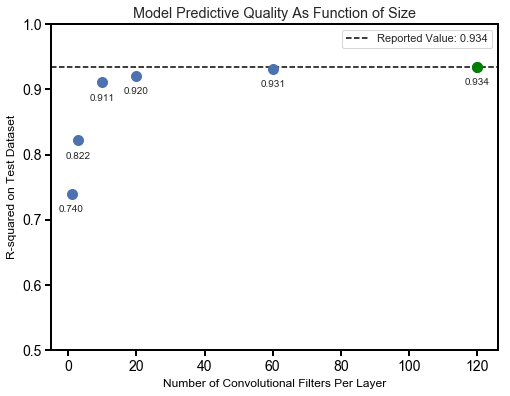

In [14]:
fig,ax = plt.subplots(figsize=(8,6))
ax.axhline(0.93385044762,xmax=123,xmin=0,linestyle='--',label='Reported Value: 0.934',color='black')
ax.plot(n_filters,rsquared,marker='o',markersize=10,linestyle='None')
ax.plot([120],[0.933850],marker='o',markersize=10,color='green') #highlight the author's model
ax.set_xlabel("Number of Convolutional Filters Per Layer",size='large')
ax.set_ylabel("R-squared on Test Dataset",size='large')
ax.set_title("Model Predictive Quality As Function of Size",size='x-large')
ax.set_ylim(top=1.0,bottom=0.5)
plt.legend()

for x,y in zip(n_filters,rsquared):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-18), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


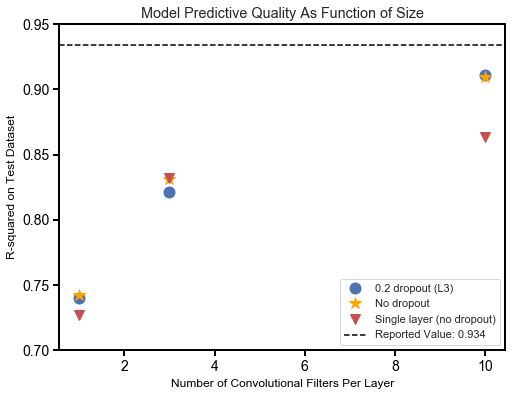

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(n_filters[:3],rsquared[:3],marker='o',markersize=11,linestyle='None',label='0.2 dropout (L3)')
ax.plot(nf_nodrop,rsq_nodrop,marker='*',color='orange',markersize=12,linestyle='None',label='No dropout')
ax.plot(nf_onelayer,rsq_onelayer,marker='v',color='r',markersize=10,linestyle='None',label='Single layer (no dropout)')
ax.set_xlabel("Number of Convolutional Filters Per Layer",size='large')
ax.set_ylabel("R-squared on Test Dataset",size='large')
ax.axhline(0.93385044762,xmax=123,xmin=0,linestyle='--',label='Reported Value: 0.934',color='black')
ax.set_title("Model Predictive Quality As Function of Size",size='x-large')
ax.set_ylim(top=0.95,bottom=0.7)
plt.legend()

# Goal: Investigate the Author's Model (and the small version) and Look At How it Predicts

### What Does the Model Structure Look Like?

In [22]:
z = model.get_weights()
print len(z)
for i in range(len(z)):
    print i, z[i].shape

10
0 (8, 4, 120)
1 (120,)
2 (8, 120, 120)
3 (120,)
4 (8, 120, 120)
5 (120,)
6 (6000, 40)
7 (40,)
8 (40, 1)
9 (1,)


In [23]:
x = small_model.get_weights()
print len(x)
for i in range(len(x)):
    print i, z[i].shape

10
0 (8, 4, 120)
1 (120,)
2 (8, 120, 120)
3 (120,)
4 (8, 120, 120)
5 (120,)
6 (6000, 40)
7 (40,)
8 (40, 1)
9 (1,)


### Can we extract the actual motifs from the filters?

Text(0.5,1,'First Filter Visualized')

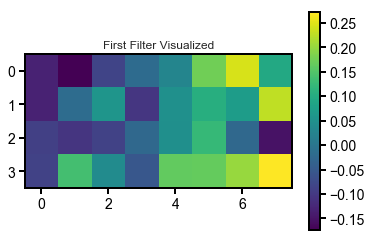

In [24]:
NFILTERS = len(x)
filters = [x[0][:,:,i] for i in range(NFILTERS)] #layer 1 filters
df_example = pd.DataFrame(data=filters[0])
df_example = df_example.transpose(copy=True)
plt.imshow(df_example,cmap='viridis') #bp position along the bottom, A/T/G/C along y axis
plt.colorbar()
plt.title("First Filter Visualized")
#are the ones with the highest activation the ones with AUG?
# figure out how to decode filters into BP motifs

### Can we visualize these filters as motifs that include information about avoidance (aka negative weights) as well?

In [25]:
min_weight = np.amin(filters)
max_weight = np.amax(filters)
print 'min', min_weight, 'max', max_weight

min -0.6215278 max 0.45045346


In [26]:
# Normalize to -1.0 +1.0 range
# nfilters = filters/np.max(np.abs(filters))

# ...Or don't normalize!
nfilters = filters

In [27]:
A = [ np.array([p[0] for p in f ]) for f in nfilters ]
C = [ np.array([p[1] for p in f ]) for f in nfilters ]
G = [ np.array([p[2] for p in f ]) for f in nfilters ]
T = [ np.array([p[3] for p in f ]) for f in nfilters ]

In [28]:
def compute_stacked_bot_grid(filterGrid):
    # order: ACGT 0123
    # Note that these comparisons ASSUME that there are no duplicated weights. Probably 
    # this is valid given the number of decimal points involved.
    botGrid = np.zeros(filterGrid.shape)
    for r in range(len(filterGrid)):
        rowValues = filterGrid[r]
        for c,v in enumerate(rowValues):
            colValues = filterGrid[:,c]
            if v < 0: #if value to compute bot for is negative,
                colValues = colValues[(colValues<0)&(colValues!=v)] #keep only the other negative vals in the col
                while len(colValues) > 0:
                    m = np.max(colValues)
                    if v < m:
                        botGrid[r][c] += m
                        colValues = colValues[colValues != m] # down to maximum of 2 other values 
                    else:
                        break
            else: #if value to compute bot for is positive (or zero),
                colValues = colValues[(colValues>0)&(colValues!=v)] #keep only the other positive vals in the col
                while len(colValues) > 0:
                    m = np.min(colValues)
                    if v > m:
                        botGrid[r][c] += m
                        colValues = colValues[colValues != m] # down to maximum of 2 other values
                    else:
                        break
    return botGrid
            

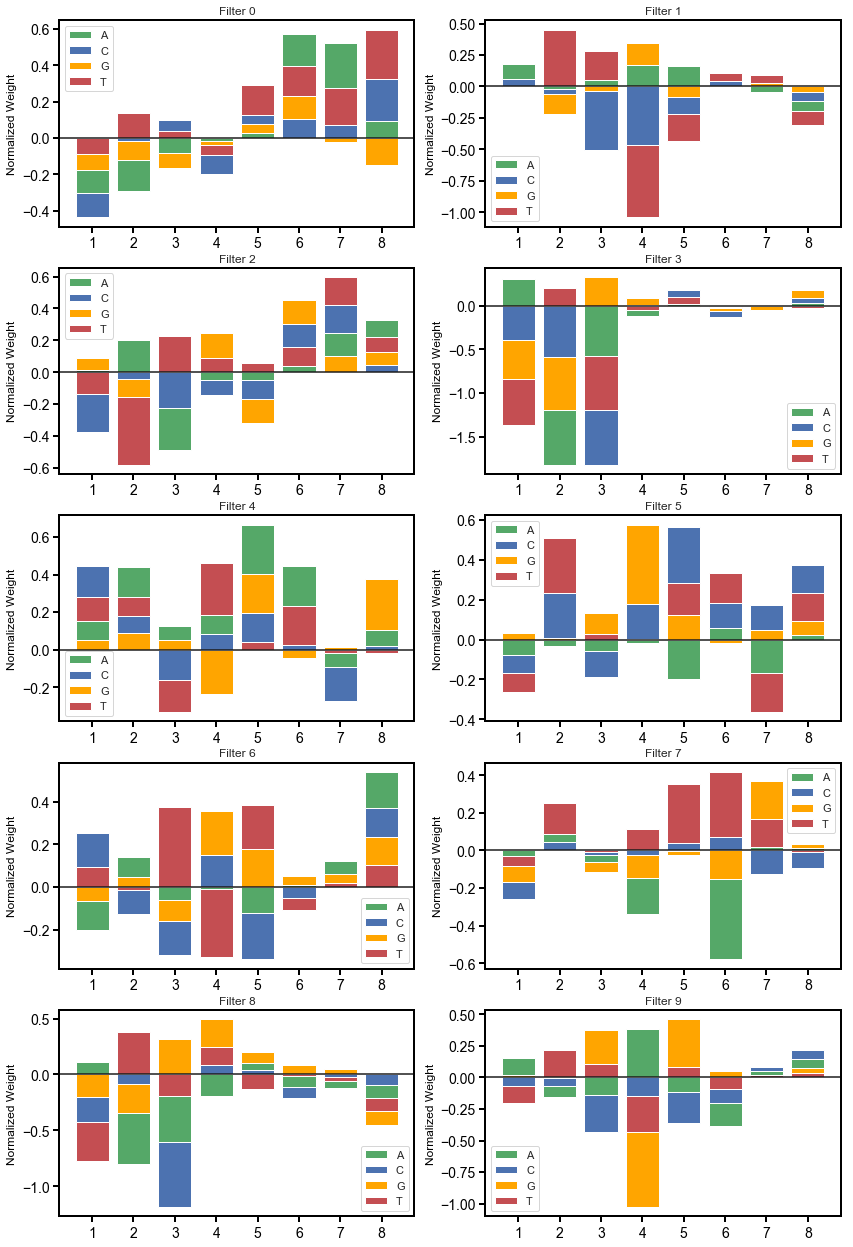

In [29]:
index = np.arange(8) #8 BP WINDOW
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(14,22)) #TEN FILTERS
for r in range(5):
    for c in range(2):
        i = (r*2) + c
        ax = axes[r][c]
        filterGrid = np.array([A[i],C[i],G[i],T[i]])
        botGrid = compute_stacked_bot_grid(filterGrid)
        # Format so that the negatives and positives don't add together, but stay as independent bars
        pA = ax.bar(index,A[i],width=0.8,color='g',label='A',bottom=botGrid[0])
        pC = ax.bar(index,C[i],width=0.8,color='b',label='C',bottom=botGrid[1])
        pG = ax.bar(index,G[i],width=0.8,color='orange',label='G',bottom=botGrid[2])
        pT = ax.bar(index,T[i],width=0.8,color='r',label='T',bottom=botGrid[3])
        ax.set_xticklabels(['1','2','3','4','5','6','7','8'])
        ax.axhline(y=0,color='k')
        ax.set_xticks(np.arange(8))
        ax.set_ylabel("Normalized Weight")
        ax.set_title("Filter "+str(i))
        ax.legend()
        

In [30]:
x[1] # the relu activation parameter for each of the 120 filters
print x[1][:10], '...'

[ 0.07815184 -0.0129499   0.04890249 -0.05791424  0.02559925  0.06042942
  0.02655006  0.04421787 -0.03058615  0.00078783] ...


Text(0.5,1,'Sorted ReLu parameters for the 10 Filters')

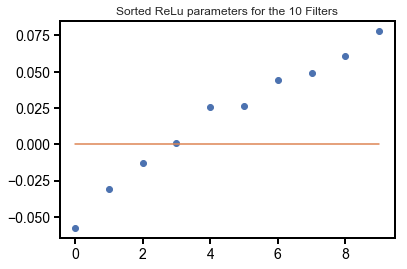

In [31]:
plt.plot(range(NFILTERS),sorted(x[1]),marker='o',linestyle='None')
plt.plot(range(NFILTERS),[0.0]*NFILTERS)
plt.title("Sorted ReLu parameters for the "+str(NFILTERS)+" Filters")

In [32]:
# Get just the filters with the highest relu weighting 
#   (actually...hmm, is lower better? point where switches to linear is lower, aka we care sooner...?)
top_filters = []
for i in range(NFILTERS):
    if x[1][i] < 0.0:
        top_filters.append({'index':i,'filter':filters[i]})

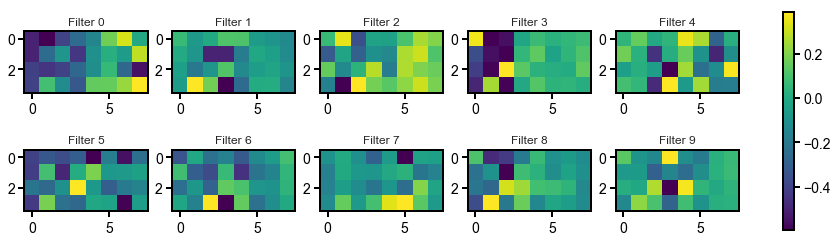

In [33]:
fig,axes = plt.subplots(ncols=5,nrows=2,figsize=(16,4))
#fig,axes = plt.subplots(ncols=4,nrows=1,figsize=(12,4))
for j,f in enumerate(filters):
    ax = axes[j/5,j%5] 
    #ax = axes[j]
    data = np.transpose(f)
    p = ax.imshow(data,cmap='viridis') #bp position along the bottom, A/T/G/C along y axis
    ax.set_title("Filter "+str(j))
fig.colorbar(p, ax=axes)

## Repeat Author's 8-mer motif Analysis 

(despite the fact that we may have some issues with analyzing the filters this way. Good for comparison, and so we can see what happens in the 10-filter small model)

### What are all the 8-mers present in each dataset and the total dataset?

In [34]:
train_seqs = e_train['utr'].values
test_seqs = e_test['utr'].values
all_seqs = np.concatenate((train_seqs,test_seqs),axis=0)
print 'train', len(train_seqs), 'test', len(test_seqs), 'total', len(all_seqs)

train 260000 test 20000 total 280000


In [35]:
def get_8mer_counts(seqs_set,filename):
    dict_8mers = {}
    for i,s in enumerate(seqs_set):
        for j in range(len(s)-8):
            ss = s[j:j+8]
            dict_8mers[ss] = dict_8mers.get(ss, 0) + 1
    print 'number of unique 8mers:', len(set(dict_8mers.keys()))
    freq_8mers = pd.DataFrame(sorted(list(dict_8mers.items()),key=lambda n: n[1],reverse=True),columns=['8mer','frequency'])
    freq_8mers.to_csv("./saved_sequences/"+filename)
    return freq_8mers

#### Note that 4 to the 8th is 65536, so this is the theoretical maximum of possible different 8-mers of ATGC

In [36]:
train_8mers = get_8mer_counts(train_seqs,'train_8mers.csv')
test_8mers = get_8mer_counts(test_seqs,'test_8mers.csv')
total_8mers = get_8mer_counts(all_seqs,'total_8mers.csv')

number of unique 8mers: 65536
number of unique 8mers: 65475
number of unique 8mers: 65536


### Compute the Activation Value for every Filter and every 8-mer

In [37]:
filter_pairs = [{
    'relu_param': x[1][i],
    'filter': filters[i],
    'filter_index': i
} for i in range(len(filters))]
# each layer 1 filter paired with its relu param, for easier access

In [38]:
# get one-hot encoding
char_8mers_total = total_8mers['8mer'].values
vector_8mers_total = one_hot_encode(pd.DataFrame({'utr':char_8mers_total}),seq_len=8)

In [39]:
# This is what we want to do for each filter and 8-mer combination
print 'EXAMPLE'
print filters[0], "filter"
print vector_8mers_total[1005], "8-mer sequence"
print np.multiply(filters[0],vector_8mers_total[1005]), "element-wise multiplication"
print np.sum(np.multiply(filters[0],vector_8mers_total[1005])), "summation of product matrix"

EXAMPLE
[[-0.13031851 -0.13138102 -0.08842184 -0.08571193]
 [-0.17327303 -0.01623174 -0.10478204  0.13902846]
 [-0.08241324  0.05872033 -0.08507235  0.04123596]
 [-0.01826392 -0.10266351 -0.02279965 -0.05229434]
 [ 0.02984735  0.04986732  0.04874277  0.1639742 ]
 [ 0.17409857  0.10494626  0.12414058  0.16645883]
 [ 0.24494505  0.07307813 -0.02222814  0.20258233]
 [ 0.09503876  0.2292807  -0.1512344   0.2713132 ]] filter
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]] 8-mer sequence
[[-0.         -0.         -0.08842184 -0.        ]
 [-0.17327303 -0.         -0.          0.        ]
 [-0.08241324  0.         -0.          0.        ]
 [-0.01826392 -0.         -0.         -0.        ]
 [ 0.          0.          0.04874277  0.        ]
 [ 0.17409857  0.          0.          0.        ]
 [ 0.24494505  0.         -0.          0.        ]
 [ 0.          0.2292807  -0.          0.        ]] element-wise multiplication
0.3

In [40]:
relu = lambda a,r: max(0,(a-r))
kernel = lambda f,s: np.sum(np.multiply(f,s))

def compute_filter_activations(filter_pairs,df_8mers,save=False,path=''):
    filter_results = []
    char_8mers = df_8mers['8mer'].values
    vector_8mers = one_hot_encode(pd.DataFrame({'utr':char_8mers}),seq_len=8)
    for i,d in enumerate(filter_pairs):
        f, r = d['filter'], d['relu_param']
        outputs = [ relu(kernel(f,s),r) for s in vector_8mers ]
        nonzero_8mer_indices = [ j for j in range(len(outputs)) if outputs[j] > 0 ]
        df = pd.DataFrame({'8mer_index': nonzero_8mer_indices, 
                           'activation': [outputs[j] for j in nonzero_8mer_indices],
                           'seq': [char_8mers[j] for j in nonzero_8mer_indices],
                           'aug_count': [char_8mers[j].count('ATG') for j in nonzero_8mer_indices],
                          })
        filter_results.append(df.sort_values(by='activation',ascending=False).head(min(len(df),2000)))
        if i % 20 == 0:
            print 'filter',i

    print 'Done'
    if save == True:
        for i,fdf in enumerate(filter_results):
            fdf.to_csv('./saved_activations/'+path+'10filter'+format(i,'02')+'.csv')

    return filter_results

In [41]:
total_results = compute_filter_activations(filter_pairs,total_8mers,save=False,path='total/')
train_results = compute_filter_activations(filter_pairs,train_8mers,save=False,path='train/')
test_results = compute_filter_activations(filter_pairs,test_8mers,save=False,path='test/')

filter 0
Done
filter 0
Done
filter 0
Done


### Visualize Sequence Motifs as Logos and PFM Heatmaps

In [42]:
## Create Motif Logo Graphics
def makeLogos(results,path,name='filter'):
    for i,res in enumerate(results):
        m = motifs.create([ Seq(s) for s in res['seq'].values ])
        title = name+format(i,'02')
        m.weblogo('./saved_logos/'+path+title+'.pdf',format='pdf',
                  color_scheme='color_classic',show_fineprint=False,show_ends=False,logo_title=title)
    print 'Done'

In [43]:
# Make Logos (saves directly to files)
#makeLogos(total_results,'total/3layer10filter/',name='10filter')
#makeLogos(train_results,'train/3layer10filter/',name='10filter')
#makeLogos(test_results,'test/3layer10filter/',name='10filter')

### PFM calculations

In [26]:
def pfm(filter_df):
    seqs = filter_df['seq'].values
    A = []
    T = []
    G = []
    C = []
    for i in range(8):
        bp = ''.join([ s[i] for s in seqs])
        A.append(bp.count('A'))
        T.append(bp.count('T'))
        G.append(bp.count('G'))
        C.append(bp.count('C'))
    return pd.DataFrame({'A':A,'T':T,'G':G,'C':C})
    
    
# Question: do we want to scale the counts by the actual activation values they represent? Is that even viable?

In [27]:
total_filter_pfms = [ pfm(f) for f in total_results ]

In [222]:
# ## Raw BP Frequency Heatmaps for the 12 Most Sensitive Filters
# fig,axes = plt.subplots(ncols=3,nrows=4,figsize=(16,11))
# for j,d in enumerate(top_filters[:12]):
#     ax = axes[j/3,j%3] 
#     data = np.transpose(total_filter_pfms[d['index']].values)
#     p = ax.imshow(data,cmap='viridis') #bp position along the bottom, A/T/G/C along y axis
#     ax.set_title("Filter "+str(d['index']))
#     ax.set_yticks(np.arange(4))
#     ax.set_yticklabels(['A','C','G','T'],visible=True)
# fig.colorbar(p, ax=axes)

### Count AUG Frequency in Top 2000 8-mers per sequence

Text(0.5,1,'Histogram of Total AUG Count in Top 2000 8mers Per Filter, Test+Train')

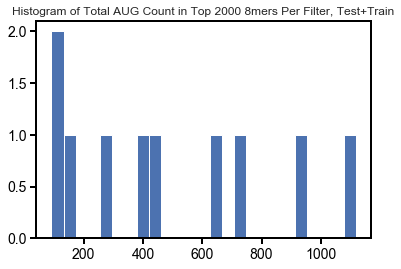

In [44]:
aug_counts = pd.DataFrame(
    data={ "total_aug":[ np.sum(f['aug_count']) for f in total_results],
           "filter_index":np.arange(len(total_results)) })
plt.hist(aug_counts['total_aug'],bins=25)
plt.title("Histogram of Total AUG Count in Top 2000 8mers Per Filter, Test+Train")

In [45]:
top_filter_indices = [ t['index'] for t in top_filters]

Text(0.5,1,'Same Histogram for Just Top Filters')

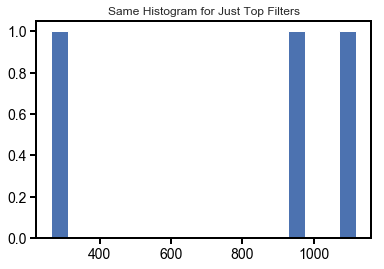

In [46]:
plt.hist(aug_counts[aug_counts['filter_index'].isin(top_filter_indices)]['total_aug'],bins=18)
plt.title("Same Histogram for Just Top Filters")

### More Histograms, Stop/Start Codon Dependence

is the average activation higher for the 8mers within the top 2000 that have a stop or a start?


Number of top 2000 8mers (non-unique) with AUG: 4767
Number of top 2000 8mers (non-unique) without AUG: 15233


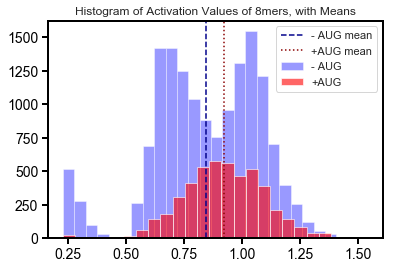

In [48]:
# Make histogram of activations for sequences with AUG and without
fig,ax = plt.subplots()
with_start = []
without_start = []
for f in total_results:
    with_start = np.concatenate((with_start,f[f['aug_count'] > 0]['activation']))
    without_start = np.concatenate((without_start,f[f['aug_count'] == 0]['activation']),axis=0)
ax.hist(without_start,color='blue',alpha=0.4,bins=25,label='- AUG')
ax.hist(with_start,color='red',alpha=0.6,bins=25,label='+AUG')
ax.axvline(np.mean(without_start),linestyle='--',color='darkblue',label='- AUG mean')
ax.axvline(np.mean(with_start),linestyle=':',color='darkred',label='+AUG mean')
ax.set_title("Histogram of Activation Values of 8mers, with Means")
ax.legend()
print 'Number of top 2000 8mers (non-unique) with AUG:', len(with_start)
print 'Number of top 2000 8mers (non-unique) without AUG:', len(without_start)

Wow, interestingly bi-modal for the small model's filters that don't have AUG. I wonder if the +AUG distribution is siginificantly higher than the low distribution's average?

Number of top 2000 8mers (non-unique) with UAA/UAG: 4200
Number of top 2000 8mers (non-unique) without UAA/UAG: 15800


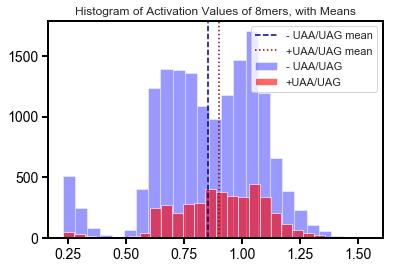

In [50]:
# Make histogram of activations for sequences with TAA/TAG and without
hasStop = lambda s: s.count('TAA') + s.count('TAG') > 0
fig,ax = plt.subplots()
with_stop = []
without_stop = []
for f in total_results:
    w = f[f['seq'].apply(hasStop) == True]
    wo = f[f['seq'].apply(hasStop) == False]
    with_stop = np.concatenate((with_stop,w['activation'])) if len(w) > 0 else with_stop
    without_stop = np.concatenate((without_stop,wo['activation'])) if len(wo) > 0 else without_stop
ax.hist(without_stop,color='blue',alpha=0.4,bins=25,label='- UAA/UAG')
ax.hist(with_stop,color='red',alpha=0.6,bins=25,label='+UAA/UAG')
ax.axvline(np.mean(without_stop),linestyle='--',color='darkblue',label='- UAA/UAG mean')
ax.axvline(np.mean(with_stop),linestyle=':',color='darkred',label='+UAA/UAG mean')
ax.set_title("Histogram of Activation Values of 8mers, with Means")
ax.legend()
print 'Number of top 2000 8mers (non-unique) with UAA/UAG:', len(with_stop)
print 'Number of top 2000 8mers (non-unique) without UAA/UAG:', len(without_stop)

In [51]:
for i,f in enumerate(total_results):
    w = f[f['seq'].apply(hasStop) == True]['activation']
    wo = f[f['seq'].apply(hasStop) == False]['activation']
    fig,ax = plt.subplots()
    ax.hist(wo,color='blue',alpha=0.4,bins=20,label='- UAA/UAG')
    ax.hist(w,color='red',alpha=0.6,bins=20,label='+UAA/UAG')
    ax.axvline(np.mean(wo),linestyle='--',color='darkblue',label='- UAA/UAG mean')
    ax.axvline(np.mean(w),linestyle=':',color='darkred',label='+UAA/UAG mean')
    ax.set_title("Activation by Stop Codon Presence, Filter "+str(i))
    ax.legend()
    plt.savefig('./plots/stop_histograms/filter'+format(i,'03')+'.png',bbox_inches='tight')
    plt.close()

In [52]:
hasStart = lambda s: s.count('ATG') > 0
for i,f in enumerate(total_results):
    w = f[f['seq'].apply(hasStart) == True]['activation']
    wo = f[f['seq'].apply(hasStart) == False]['activation']
    fig,ax = plt.subplots()
    ax.hist(wo,color='blue',alpha=0.4,bins=20,label='- AUG')
    ax.hist(w,color='red',alpha=0.6,bins=20,label='+AUG')
    ax.axvline(np.mean(wo),linestyle='--',color='darkblue',label='- AUG mean')
    ax.axvline(np.mean(w),linestyle=':',color='darkred',label='+AUG mean')
    ax.set_title("Activation by Start Codon Presence, Filter "+str(i))
    ax.legend()
    plt.savefig('./plots/start_histograms/filter'+format(i,'03')+'.png',bbox_inches='tight')
    plt.close()

## Analyze Enrichment of Start and Stop Codons

In [53]:
count_in_top2000 = { s:0 for s in total_8mers['8mer'].values }
for f in total_results:
    for s in f['seq'].values:
        count_in_top2000[s] += 1
# shows the number of times each 8mer appeared in a filter's top 2000 (all data)

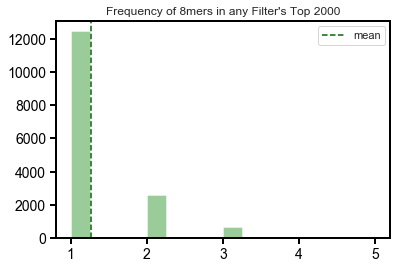

In [59]:
# histogram of how often 8mers appear in a filter's top 2000 (all data)
fig,ax = plt.subplots()
c = np.array(count_in_top2000.values())
ax.hist(c[c > 0],color='green',alpha=0.4,bins=16) # pick just the > 0 values, for interestingness
ax.axvline(np.mean(c[c > 0]),linestyle='--',color='darkgreen',label='mean')
ax.set_title("Frequency of 8mers in any Filter's Top 2000")
ax.legend()

In [60]:
hasStart = lambda s: s.count('ATG') > 0
hasStop = lambda s: s.count('TAA') + s.count('TAG') > 0

def compute_marginals(results,fn):
    count_in_top2000 = { s:0 for s in total_8mers['8mer'].values } #out of all possible 8mers
    for f in results:
        for s in f['seq'].values:
            count_in_top2000[s] += 1
    set_in_top = set([s for s,c in count_in_top2000.items() if c > 0])
    set_not_top = set([s for s,c in count_in_top2000.items() if c == 0])
    TT = len([ s for s in list(set_in_top) if fn(s)])
    TF = len(set_in_top) - TT
    FT = len([ s for s in list(set_not_top) if fn(s)])
    FF = len(set_not_top) - FT
    print "Top 2000, True:", TT
    print "Top 2000, False:", TF
    print "Not Top, True:", FT
    print "Not Top, False:", FF
    oddsratio, pvalue = stats.fisher_exact([[TT, TF], [FT, FF]])
    print "Odds Ratio:", oddsratio
    print "P Value:", pvalue
    return (oddsratio, pvalue, [[TT, TF], [FT, FF]])
    

In [61]:
# Start Codon Enrichments
print 'TOTAL'
total_fischers_start = compute_marginals(total_results,hasStart)
print "-----"
print "TRAIN"
train_fischers_start = compute_marginals(train_results,hasStart)
print "-----"
print "TEST"
test_fischers_start = compute_marginals(test_results,hasStart)


TOTAL
Top 2000, True: 2960
Top 2000, False: 12855
Not Top, True: 3088
Not Top, False: 46633
Odds Ratio: 3.4772482230055037
P Value: 0.0
-----
TRAIN
Top 2000, True: 2960
Top 2000, False: 12855
Not Top, True: 3088
Not Top, False: 46633
Odds Ratio: 3.4772482230055037
P Value: 0.0
-----
TEST
Top 2000, True: 2961
Top 2000, False: 12849
Not Top, True: 3087
Not Top, False: 46639
Odds Ratio: 3.481622487893126
P Value: 0.0


In [62]:
print 'TOTAL'
total_fischers_stop = compute_marginals(total_results,hasStop)
print "-----"
print "TRAIN"
train_fischers_stop = compute_marginals(train_results,hasStop)
print "-----"
print "TEST"
test_fischers_stop = compute_marginals(test_results,hasStop)

TOTAL
Top 2000, True: 3573
Top 2000, False: 12242
Not Top, True: 8331
Not Top, False: 41390
Odds Ratio: 1.4500364954335556
P Value: 1.781628058220298e-59
-----
TRAIN
Top 2000, True: 3573
Top 2000, False: 12242
Not Top, True: 8331
Not Top, False: 41390
Odds Ratio: 1.4500364954335556
P Value: 1.781628058220298e-59
-----
TEST
Top 2000, True: 3575
Top 2000, False: 12235
Not Top, True: 8329
Not Top, False: 41397
Odds Ratio: 1.4522723863814169
P Value: 5.410394446804155e-60


In [72]:
# Compute the set of utr seqs that are in the top 2000 of any filter, and the set of those that are not
set_top_8mers = set([s for s,c in count_in_top2000.items() if c > 0])
set_not_8mers = set([s for s,c in count_in_top2000.items() if c == 0])
set_all_8mers = set(total_8mers['8mer'].values)

print len(set_top_8mers), len(set_not_8mers)

15815 49721


In [73]:
## Repeat for stop codons
count_taa_top = 0
count_taa_all = 0
count_taa_not_top = 0
for i,s in enumerate(total_8mers['8mer']):
    c = 1 if 'TAA' in s or 'TAG' in s or 'TGA' in s else 0
    count_taa_all += c
    if s in set_top_8mers:
        count_taa_top += c
    else:
        count_taa_not_top += c

# Table of Marginal Values
YY = count_taa_top
NY = count_taa_not_top
YN = len(set_top_8mers) - count_taa_top
NN = len(set_all_8mers) - len(set_top_8mers) - count_taa_not_top
print 'in top, has TAA/TAG/TGA:', YY
print 'not in top, has TAA/TAG/TGA:', NY
print 'in top, no TAA/TAG/TGA:', YN
print 'not in top, no TAA/TAG/TGA:', NN

in top, has TAA/TAG/TGA: 5654
not in top, has TAA/TAG/TGA: 11914
in top, no TAA/TAG/TGA: 10161
not in top, no TAA/TAG/TGA: 37807


In [75]:
oddsratio, pvalue = stats.fisher_exact([[YY, NY], [YN, NN]])
print 'odds ratio', "\t", oddsratio
print 'p value', "\t", pvalue

odds ratio 	1.7657693508196068
p value 	9.932912146399845e-180


### And now, we return to our scheduled programming...

# Visualize Model Results

In [76]:
e_test = test_data(df=e_test, model=model, obs_col='rl',test_seq=seq_e_test)
r = r2(e_test['rl'], e_test['pred'])
print 'r-squared = ', r

r-squared =  0.9338504476208073


In [77]:
atg = e_test[e_test['utr'].apply(lambda x: 'ATG' in x)]
n_atg = e_test[e_test['utr'].apply(lambda x: 'ATG' not in x)]
print "Number of utrs with ATG:", len(atg)
print "Number of utrs without ATG:", len(n_atg)

Number of utrs with ATG: 13986
Number of utrs without ATG: 6014


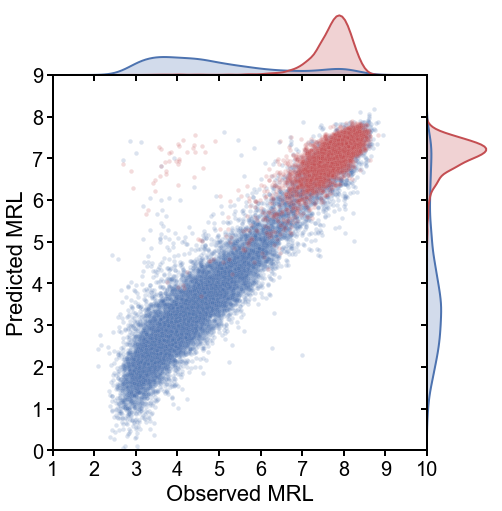

In [79]:
c1 = (0.3, 0.45, 0.69)
c2 = 'r'
g = sns.JointGrid(x='rl', y="pred", data=atg, space=0, xlim=(1,10), ylim=(0,10), ratio=6, size=7)
g.plot_joint(plt.scatter,s=20, color=c1, linewidth=0.2, alpha='0.2', edgecolor='white')
f = g.fig
ax = f.gca()
ax.set_yticks(np.arange(0,9.01, 1));
ax.set_yticklabels(range(10),size=20);
ax.set_xticks(np.arange(1,10.01, 1));
ax.set_xticklabels(range(1,11),size=20);
ax.set_ylim(0,9)
ax.set_xlim(1,10)
g.plot_marginals(sns.kdeplot,shade=c1, **{'linewidth':2, 'color':c1})
g.set_axis_labels('Observed MRL', 'Predicted MRL', **{'size':22});

g.x = n_atg['rl'].values
g.y = n_atg['pred'].values
g.plot_joint(plt.scatter, s=20, linewidth=0.2, alpha='0.2', color=c2, edgecolor='white')
g.plot_marginals(sns.kdeplot, shade=c2, **{'linewidth':2, 'color':c2})
f = g.fig

### So, just what are these off-diagonal UTRS in the graph above?

In [89]:
off_diagonals = e_test[( (e_test['pred']-e_test['rl'])**2 > 3.5) &
                   (e_test['pred']-e_test['rl'] > 0 )&(e_test['pred'] > 6)] 
len(off_diagonals)

46

In [90]:
off_diagonals = off_diagonals.drop(columns='Unnamed: 0')
off_diagonals.head(10)

,utr,0,1,2,3,4,5,6,7,8,...,r7,r8,r9,r10,r11,r12,r13,rl,pred,small_pred
292,CCCCGAGGCTTGTGAGGAGTAAAACCCAAGAGAGGTAAAGTGCCACACAA,0.000037,0.000037,0.000029,0.000015,0.000007,0.000009,0.000008,0.000008,0.000006,...,0.035301,0.029659,0.041299,0.055851,0.055851,0.053509,0.063102,4.654325,7.146987,7.230714
809,ATCGATCCACCCTGCATAGCAGGGAACTCTATTGTGCATGTTCGGATGCG,0.000044,0.000042,0.000025,0.000013,0.000009,0.000010,0.000004,0.000005,0.000004,...,0.024679,0.023677,0.021867,0.029297,0.029297,0.028727,0.042218,3.331041,6.045370,6.024487
1046,GCGAGGGAACAAGAGCAAAGGAGAATCTAGGCCACATCTCTCGTCGTTCC,0.000024,0.000037,0.000028,0.000015,0.000011,0.000009,0.000006,0.000006,0.000006,...,0.035514,0.035510,0.033592,0.039144,0.039144,0.038410,0.035048,4.038996,7.305915,7.019640
1550,CCCGACAATACTAGTGCTTTTAGGTATACACGCATAGTATGTTAACTGGT,0.000024,0.000026,0.000021,0.000009,0.000006,0.000008,0.000007,0.000007,0.000009,...,0.042699,0.054900,0.066915,0.054029,0.054029,0.064322,0.057901,5.111562,7.644063,7.517639
3031,CCGTGAAGACTTAGACTTGAATCATACTTGCCATTATAGGTCGTTTCTCG,0.000022,0.000026,0.000023,0.000010,0.000007,0.000006,0.000006,0.000007,0.000006,...,0.047457,0.043980,0.037543,0.046253,0.046253,0.052187,0.057900,4.601425,7.295456,7.574872
3279,CACCGAGTCTTGCGGCCTAAATCCGTAGGGGTCTGGGTCCACGATTGTCC,0.000036,0.000031,0.000018,0.000009,0.000006,0.000007,0.000004,0.000004,0.000004,...,0.029664,0.025882,0.026299,0.035648,0.035648,0.031976,0.037537,3.450179,6.479451,6.714327
3467,CCATCAATTTATCACATAAAGCCCTGTGTGGGTTGTCTGCGCATACAGAA,0.000029,0.000028,0.000017,0.000010,0.000006,0.000006,0.000005,0.000005,0.000005,...,0.037771,0.034125,0.037183,0.047723,0.047723,0.039136,0.056973,4.217225,7.151853,7.455392
3582,CGCGCCGAACGCGCGACAAGCAAAGCACGACAGAACGTGCCCACTAAAGC,0.000035,0.000032,0.000018,0.000008,0.000007,0.000006,0.000005,0.000004,0.000003,...,0.026047,0.023872,0.028277,0.034306,0.034306,0.025561,0.041463,3.419108,6.397795,6.442734
3974,CCAGAAGATACAACCCGGGATTACTGGCGGTCCGATTAGAACTGATCAAG,0.000033,0.000034,0.000017,0.000010,0.000005,0.000005,0.000004,0.000004,0.000004,...,0.025103,0.025401,0.027429,0.032515,0.032515,0.039899,0.053005,3.598649,7.219923,7.264654
4049,CCTGCGTCTAGCCGGTGCGTGTAACGAATATCCTACCGTTGAAATACTAC,0.000029,0.000027,0.000019,0.000012,0.000005,0.000006,0.000003,0.000004,0.000004,...,0.029767,0.028933,0.027242,0.050658,0.050658,0.038351,0.045245,3.974110,6.926174,7.101386


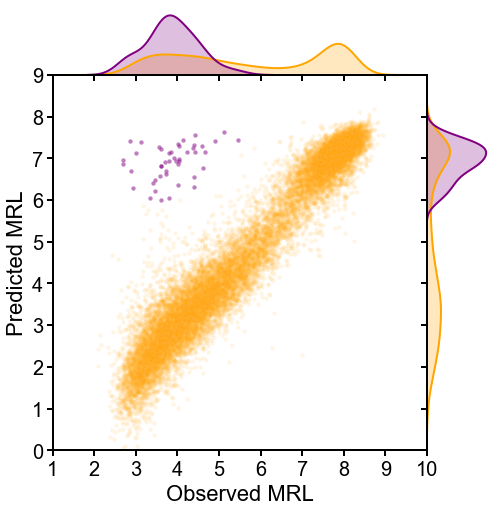

In [91]:
g = sns.JointGrid(x='rl', y="pred", data=e_test[~e_test['utr'].isin(off_diagonals['utr'].values)],
                  space=0, xlim=(1,10), ylim=(0,10), ratio=6, size=7)
g.plot_joint(plt.scatter,s=20, color='orange', linewidth=0.2, alpha='0.1', edgecolor='white')
f = g.fig
ax = f.gca()
ax.set_yticks(np.arange(0,9.01, 1));
ax.set_yticklabels(range(10),size=20);
ax.set_xticks(np.arange(1,10.01, 1));
ax.set_xticklabels(range(1,11),size=20);
ax.set_ylim(0,9)
ax.set_xlim(1,10)
g.plot_marginals(sns.kdeplot,shade='orange', **{'linewidth':2, 'color':'orange'})
g.set_axis_labels('Observed MRL', 'Predicted MRL', **{'size':22});

g.x = off_diagonals['rl'].values
g.y = off_diagonals['pred'].values
g.plot_joint(plt.scatter, s=20, linewidth=0.2, alpha='0.5', color='purple', edgecolor='white')
g.plot_marginals(sns.kdeplot, shade='purple', **{'linewidth':2, 'color':'purple'})
f = g.fig

### NOTE: here, we set the predicted MRL lower limit for the off-diagonals to 6. In future graphs, based on cluster location, we set the limit to 6.5. This can be changed here or there for better comparison

In [92]:
off_diagonals.to_csv('./saved_data/off_diagonal_cluster/CNN_auth_test_od_PaperFigure.csv')

In [93]:
#How many of these contain 'ATG'?
atg_true = off_diagonals[off_diagonals['utr'].apply(lambda x: 'ATG' in x)]
atg_false = off_diagonals[off_diagonals['utr'].apply(lambda x: 'ATG' not in x)]

In [94]:
print len(atg_true)
print len(atg_false)

12
34


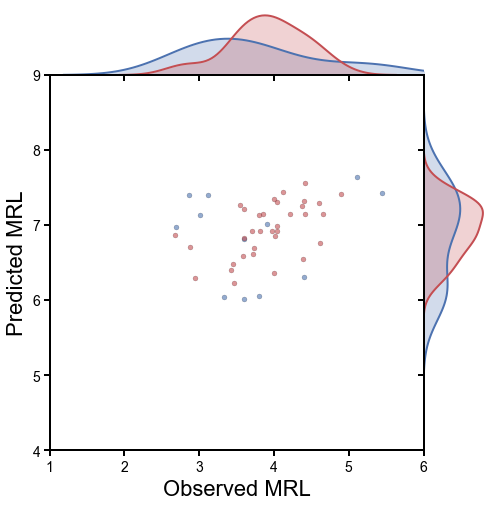

In [95]:
g = sns.JointGrid(x='rl', y="pred", data=atg_true, space=0, xlim=(1,10), ylim=(0,10), ratio=6, size=7)
g.plot_joint(plt.scatter,s=25, color=c1, linewidth=0.2, alpha='0.6', edgecolor='black')
f = g.fig
ax = f.gca()
# ax.set_yticks(np.arange(0,9.01, 1));
# ax.set_yticklabels(range(10),size=20);
# ax.set_xticks(np.arange(1,10.01, 1));
# ax.set_xticklabels(range(1,11),size=20);
ax.set_ylim(4,9)
ax.set_xlim(1,6)
g.plot_marginals(sns.kdeplot,shade=c1, **{'linewidth':2, 'color':'b'})
g.set_axis_labels('Observed MRL', 'Predicted MRL', **{'size':22});

g.x = atg_false['rl'].values
g.y = atg_false['pred'].values
g.plot_joint(plt.scatter, s=25, linewidth=0.2, alpha='0.6', color='r', edgecolor='black')
g.plot_marginals(sns.kdeplot, shade='r', **{'linewidth':2, 'color':'r'})
f = g.fig